In [42]:
import os
import pandas as pd
import git
import matplotlib.pyplot as plt
import folderstats
import numpy as np
import math

In [43]:
def expected_operations(N,k,p):
    if(k==0.0):
        k=N
    number_of_pools = np.ceil(N/k)
    number_of_positive_pools = (1 - np.power((1-p),k)) * number_of_pools
    return np.ceil(number_of_pools + number_of_positive_pools*k)

def expected_writes(N,k,p):
    if(k==0.0):
        k=N
    number_of_pools = np.ceil(N/k)
    return number_of_pools

def expected_scrubbing(N,k,p):
    if(k==0.0):
        k=N
    number_of_pools = np.ceil(N/k)
    number_of_positive_pools = (1 - np.power((1-p),k))* number_of_pools
    return np.ceil(number_of_positive_pools*k)

def optimal_pool_size(N,p):
    if(p<=0.0):
        return N
    return np.ceil(1.24*np.power(p,-0.466))

In [44]:
folder = "../../data/format-corpus"
relative_path = '../../data/format-corpus'
repo = git.Git(folder)
df = folderstats.folderstats(folder, ignore_hidden=True,hash_name="sha256")
df = df[df.folder==False]
df.head()

,id,path,name,extension,size,atime,mtime,ctime,folder,num_files,depth,parent,uid,sha256
0,4,../../data/format-corpus\desktop-publishing\In...,Neddy_Flyer_ft_HeatherRyan,jpg,1620612,2022-04-06 16:42:44,2022-03-22 11:00:24,2022-03-22 11:00:24,False,NaN,2,3,0,9d89cc0347adeb5141e4feea3d411b0fd2252c63145e1c...
1,5,../../data/format-corpus\desktop-publishing\In...,Neddy_Flyer_HeatherRyan,indd,1503232,2022-04-06 16:42:44,2022-03-22 11:00:24,2022-03-22 11:00:24,False,NaN,2,3,0,8f206d618c0161cfddf4c18aa3932ed99d9e500bf1260c...
2,6,../../data/format-corpus\desktop-publishing\In...,Neddy_Flyer_HeatherRyan,pdf,59106,2022-04-06 16:42:44,2022-03-22 11:00:24,2022-03-22 11:00:24,False,NaN,2,3,0,6a3c9444d4905c8896a717be7c30ee7d20b3c319eb2d3d...
3,7,../../data/format-corpus\desktop-publishing\In...,Neddy_Flyer_README_HeatherRyan.md,rtf,1232,2022-04-06 16:42:44,2022-03-22 11:00:24,2022-03-22 11:00:24,False,NaN,2,3,0,3ef3b90e7bf9e863d1ae9f862eaa5e1cd87e8f9ef67438...
6,11,../../data/format-corpus\disk-images\fat12\opf...,blank-untitled-volume,img,1474560,2022-04-06 16:42:44,2022-03-22 11:00:24,2022-03-22 11:00:24,False,NaN,3,10,0,039713487932afa67bd3c024e4d6284aac5548092d8b9b...


<AxesSubplot:>

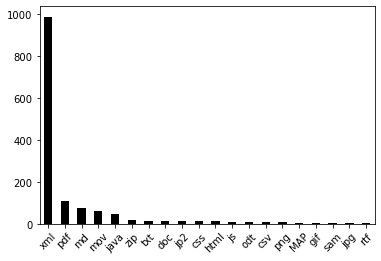

In [45]:
df.extension.value_counts()[:20].plot.bar(rot=45,color="black")

In [46]:
N = df.shape[0]
df = df[["path","name","extension","size","sha256"]]
df["changes"] = df.apply(lambda row: len(repo.log("--oneline",os.path.relpath(row.path, relative_path)).splitlines()) - 1 ,axis=1)
df.head()

,path,name,extension,size,sha256,changes
0,../../data/format-corpus\desktop-publishing\In...,Neddy_Flyer_ft_HeatherRyan,jpg,1620612,9d89cc0347adeb5141e4feea3d411b0fd2252c63145e1c...,0
1,../../data/format-corpus\desktop-publishing\In...,Neddy_Flyer_HeatherRyan,indd,1503232,8f206d618c0161cfddf4c18aa3932ed99d9e500bf1260c...,0
2,../../data/format-corpus\desktop-publishing\In...,Neddy_Flyer_HeatherRyan,pdf,59106,6a3c9444d4905c8896a717be7c30ee7d20b3c319eb2d3d...,0
3,../../data/format-corpus\desktop-publishing\In...,Neddy_Flyer_README_HeatherRyan.md,rtf,1232,3ef3b90e7bf9e863d1ae9f862eaa5e1cd87e8f9ef67438...,0
6,../../data/format-corpus\disk-images\fat12\opf...,blank-untitled-volume,img,1474560,039713487932afa67bd3c024e4d6284aac5548092d8b9b...,0


In [47]:
s1 = df["extension"].value_counts().rename("N")
s2 = df.loc[df["changes"]>0].groupby(["extension"])["changes"].count().rename("positives")
df_ = pd.concat([s1, s2], axis=1)
df_["positives"] = df_["positives"].fillna(0)
df_.head()

,N,positives
xml,986,432.0
pdf,106,2.0
md,74,17.0
mov,61,0.0
java,47,39.0


In [48]:
df_["p"] = df_.apply(lambda row: row.positives/row.N,axis=1).clip(upper=1)
df_ = df_.sort_values(by=["N"],ascending=False)
df_[:15]

,N,positives,p
xml,986,432.0,0.438134
pdf,106,2.0,0.018868
md,74,17.0,0.229730
mov,61,0.0,0.000000
java,47,39.0,0.829787
zip,17,0.0,0.000000
txt,14,2.0,0.142857
doc,13,0.0,0.000000
jp2,12,0.0,0.000000
css,11,4.0,0.363636


In [49]:


df_["k"] = df_.apply(lambda row: optimal_pool_size(row.N,row.p),axis=1)
df_["T(S_i)"] = df_.apply(lambda row:  expected_operations(row.N,1,row.p),axis=1)
df_["C(S_i)"] = df_.apply(lambda row:  expected_writes(row.N,1,row.p),axis=1)
df_["T(S_cs)"] = df_.apply(lambda row:  expected_operations(row.N,row.k,row.p),axis=1)
df_["C(S_cs)"] = df_.apply(lambda row:  expected_writes(row.N,row.k,row.p),axis=1)
df_[:15]

,N,positives,p,k,T(S_i),C(S_i),T(S_cs),C(S_cs)
xml,986,432.0,0.438134,2.0,1418.0,986.0,1168.0,493.0
pdf,106,2.0,0.018868,8.0,108.0,106.0,30.0,14.0
md,74,17.0,0.229730,3.0,91.0,74.0,66.0,25.0
mov,61,0.0,0.000000,61.0,61.0,61.0,1.0,1.0
java,47,39.0,0.829787,2.0,86.0,47.0,71.0,24.0
zip,17,0.0,0.000000,17.0,17.0,17.0,1.0,1.0
txt,14,2.0,0.142857,4.0,16.0,14.0,12.0,4.0
doc,13,0.0,0.000000,13.0,13.0,13.0,1.0,1.0
jp2,12,0.0,0.000000,12.0,12.0,12.0,1.0,1.0
css,11,4.0,0.363636,2.0,15.0,11.0,14.0,6.0


In [50]:
efficiency = df_["T(S_i)"].sum()/df_["T(S_cs)"].sum()
cost_efficiency = df_["C(S_i)"].sum()/df_["C(S_cs)"].sum()

print("E(S_cs)={}".format(efficiency))
print("C(S_cs)={}".format(cost_efficiency))


E(S_cs)=1.3718120805369127
C(S_cs)=2.3207261724659607


In [51]:
N=df_["N"].sum()
p=df_["p"].mean()
k=optimal_pool_size(N,p)
print("E(S_h)={}".format(df_["T(S_i)"].sum()/expected_operations(N,k,p)))
print("C(S_h)={}".format(df_["C(S_i)"].sum()/expected_writes(N,k,p)))

E(S_h)=2.8115543328748283
C(S_h)=4.996742671009772
